# Using Simple Linear Regression we find out the value of an unknown case..


In [2]:
#Import neccassory files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [3]:
new=pd.read_csv('FuelConsumptionCo2.csv')

In [5]:
#top 5 results in our dataframe
new.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
#check wheather our dataframe contains null values
new.notnull().values.any()

True

####
We found that there is no null values in our dataset.

In [13]:
#lets have a exploration of our dataset
new.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [21]:
#Create a new dataframe and explore it with the help of histogram.
new_df=new[['ENGINESIZE','CO2EMISSIONS','CYLINDERS','FUELCONSUMPTION_COMB_MPG']]
new_df.head()

,ENGINESIZE,CO2EMISSIONS,CYLINDERS,FUELCONSUMPTION_COMB_MPG
0,2.0,196,4,33
1,2.4,221,4,29
2,1.5,136,4,48
3,3.5,255,6,25
4,3.5,244,6,27


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002443801B1D0>,
      dtype=object)

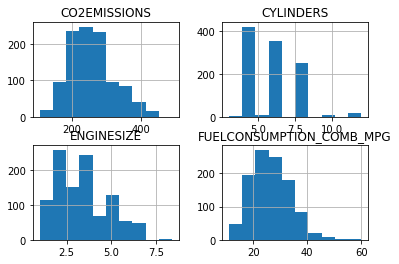

In [27]:
new_df.hist()

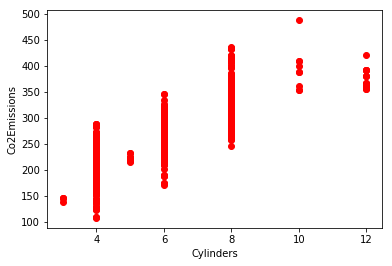

In [63]:
#Now we need to check about the linear relationship in the independent variables.We go for scatter plot to do same one by one
#Now, lets plot each of these features vs the Emission, to see how linear is their relation
plt.scatter(new_df.CYLINDERS,new_df.CO2EMISSIONS,COLOR='RED')
plt.xlabel('Cylinders')
plt.ylabel('Co2Emissions')
plt.savefig('CylinderVsCo2emission.png')
plt.show()

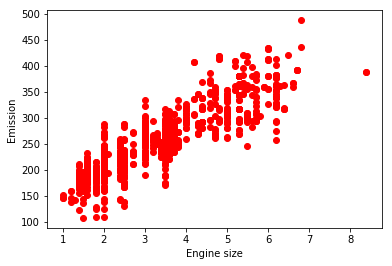

In [65]:
plt.scatter(new_df.ENGINESIZE, new_df.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.savefig('EnginesizeVsEmission.png')
plt.show()

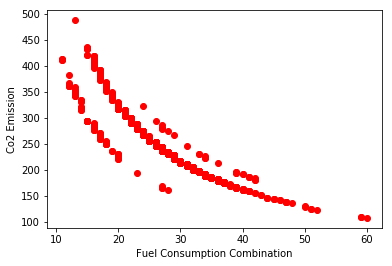

In [66]:
plt.scatter(new_df.
FUELCONSUMPTION_COMB_MPG,new_df.CO2EMISSIONS,COLOR='RED')
plt.xlabel('Fuel Consumption Combination')
plt.ylabel('Co2 Emission')
plt.savefig('fuelCombinbationvsEmission.png')
plt.show()

In [35]:
#According to the above scatter plots we found Cylinders,engine size have better linear relationship with co2emissions.

## Creating train and test dataset

###Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [49]:
tat=np.random.rand(len(new_df))<0.8
train = new_df[tat]
test = new_df[~tat]
#We have total number of 1067 records in our dataset and we split it into 80% as a train set and 20% as a test set.



## Simple Regression Model :

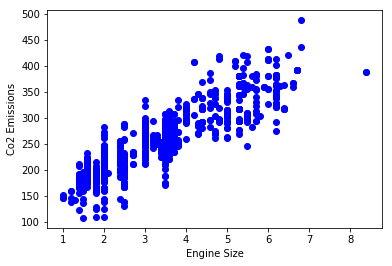

In [67]:
#train data distribution with the help of scatter plot
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.savefig('Scatter1.png')
plt.show()

## Modeling: Using Sklearn to package model.
    

In [59]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x,train_y)
print('Coefficients:',reg.coef_)
print('intercept:',reg.intercept_)


Coefficients: [[39.49238868]]
intercept: [123.59911403]


## Plot Outputs :

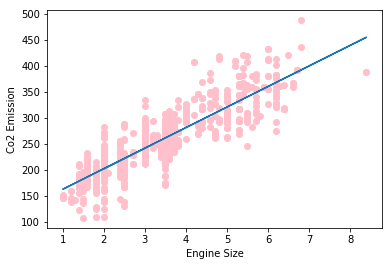

In [68]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='pink')
plt.plot(train_x,reg.coef_*train_x+reg.intercept_)
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emission')
plt.savefig('Scatter1outputline.png')
plt.show()